## Import Libraries

In [1]:
# Reading Data and EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import os, nltk, re, string
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from scipy.sparse import vstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE





# Featuer Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Load and Review Datasets

In [2]:

# Load datasets
df1 = train_data = pd.read_csv('train_Dataset.csv')
df2 = test_data = pd.read_csv('test_Dataset.csv')
df3 = test_labels = pd.read_csv('test_labels.csv')


# Display first few rows of each dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nTest Labels:")
print(test_labels.head())

Train Data:
                                        comment_text                id  \
0  explanation why the edits made under my userna...  0000997932d777bf   
1  d aww  he matches this background colour i m s...  000103f0d9cfb60f   
2  hey man  i m really not trying to edit war  it...  000113f07ec002fd   
3    more i can t make any real suggestions on im...  0001b41b1c6bb37e   
4  you  sir  are my hero  any chance you remember...  0001d958c54c6e35   

   identity_hate  insult  obscene  severe_toxic  threat  toxic  toxicity  
0              0       0        0             0       0      0         0  
1              0       0        0             0       0      0         0  
2              0       0        0             0       0      0         0  
3              0       0        0             0       0      0         0  
4              0       0        0             0       0      0         0  

Test Data:
                                        comment_text                id  \
0  yo b

In [3]:
df1.head()

,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0,0,0,0,0,0,0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0,0,0,0,0,0,0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0,0,0,0,0,0,0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0,0,0,0,0,0,0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0,0,0,0,0,0,0


In [4]:
df2.head()

,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic,toxicity
0,yo bitch ja rule is more succesful then you ll...,00001cee341fdb12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,from rfc the title is fine as it is imo,0000247867823ef7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sources zawe ashton on lapland,00013b17ad220c46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,if you have a look back at the source the in...,00017563c3f7919a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,i don t anonymously edit articles at all,00017695ad8997eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df3.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


## Data Preprocessing
### Understand the Structure and Content

In [6]:
# Check for missing values
print("Missing values in train data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())

print("\nMissing values in test labels:")
print(test_labels.isnull().sum())

# Check data types and basic statistics
print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

print("\nTest Labels Info:")
print(test_labels.info())


Missing values in train data:
comment_text     0
id               0
identity_hate    0
insult           0
obscene          0
severe_toxic     0
threat           0
toxic            0
toxicity         0
dtype: int64

Missing values in test data:
comment_text         15
id                    0
identity_hate    153164
insult           153164
obscene          153164
severe_toxic     153164
threat           153164
toxic            153164
toxicity         153164
dtype: int64

Missing values in test labels:
id               0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   id             159571 non-null  object
 2   identity_hate  159571 non-null  int64 
 

## Label Distribution Analysis 

C:\Users\DELL\AppData\Local\Temp\ipykernel_19780\3269180481.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')


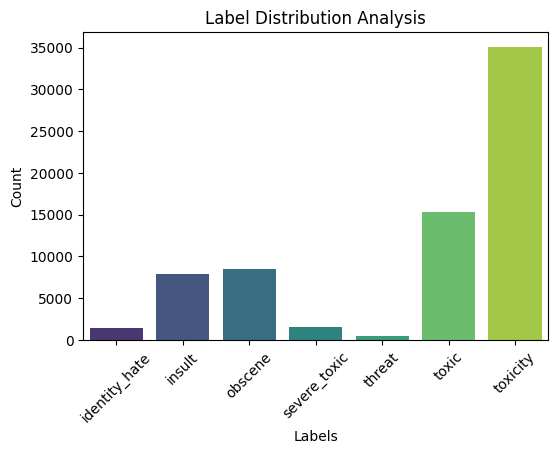

Label Distribution Analysis
The distribution of labels in the dataset is as follows:

identity_hate: 1405
insult: 7877
obscene: 8449
severe_toxic: 1595
threat: 478
toxic: 15294
toxicity: 35098


In [7]:
# Label Distribution Analysis for df1

# Assuming df1 is already loaded with the dataset
df1 = train_data = pd.read_csv('train_Dataset.csv')

# List of label columns
label_columns = [
    'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat',
    'toxic', 'toxicity']

# Calculate the distribution of each label
label_distribution = df1[label_columns].sum()

# Plot the label distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')
plt.title('Label Distribution Analysis')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Print the label distribution in the specified format
print("Label Distribution Analysis")
print("The distribution of labels in the dataset is as follows:\n")

for label, count in label_distribution.items():
    print(f"{label}: {count}")

In [8]:
# Let us merge Severe_toxic and Toxic together in df1(train_Dataset)

# Create a new column that is the sum of 'severe_toxic' and 'toxic'
df1['toxic'] = df1['severe_toxic'] + df1['toxic']

# Drop the original 'severe_toxic' column
df1.drop(columns=['severe_toxic'], inplace=True)

# Rename columns in df1
df1.rename(columns={
    'toxic': 'severe_toxic',
    'toxicity': 'toxic'
}, inplace=True)

# Drop id column
#column_to_drop = ['id']

# Drop the specified columns
#df1.drop(columns=column_to_drop, inplace=True)

# Display the updated DataFrame to ensure the merge is done correctly
df1.head()

,comment_text,id,identity_hate,insult,obscene,threat,severe_toxic,toxic
0,explanation why the edits made under my userna...,0000997932d777bf,0,0,0,0,0,0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0,0,0,0,0,0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0,0,0,0,0,0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0,0,0,0,0,0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0,0,0,0,0,0


In [9]:
# Let us merge Severe_toxic and Toxic together in df2(test_Dataset)

# Create a new column that is the sum of 'severe_toxic' and 'toxic'
df2['toxic'] = df2['severe_toxic'] + df2['toxic']

# Drop the original 'severe_toxic' column
df2.drop(columns=['severe_toxic'], inplace=True)

# Rename columns in df1
df2.rename(columns={
    'toxic': 'severe_toxic',
    'toxicity': 'toxic'
}, inplace=True)

# Drop id column
#column_to_drop = ['id']

# Drop the specified columns
#df2.drop(columns=column_to_drop, inplace=True)

# Display the updated DataFrame to ensure the merge is done correctly
df2.head()

,comment_text,id,identity_hate,insult,obscene,threat,severe_toxic,toxic
0,yo bitch ja rule is more succesful then you ll...,00001cee341fdb12,NaN,NaN,NaN,NaN,NaN,NaN
1,from rfc the title is fine as it is imo,0000247867823ef7,NaN,NaN,NaN,NaN,NaN,NaN
2,sources zawe ashton on lapland,00013b17ad220c46,NaN,NaN,NaN,NaN,NaN,NaN
3,if you have a look back at the source the in...,00017563c3f7919a,NaN,NaN,NaN,NaN,NaN,NaN
4,i don t anonymously edit articles at all,00017695ad8997eb,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# List of label columns (excluding 'comment_text' or any non-label columns)
label_columns = [
    'identity_hate', 'insult', 'obscene', 'threat', 'severe_toxic', 'toxic']

# Calculate the distribution of each label
label_distribution = df1[label_columns].sum()

# Print the label distribution
print("Label Distribution Analysis")
print("The distribution of labels in the dataset is as follows:\n")

for label, count in label_distribution.items():
    print(f"{label}: {count}")

Label Distribution Analysis
The distribution of labels in the dataset is as follows:

identity_hate: 1405
insult: 7877
obscene: 8449
threat: 478
severe_toxic: 16889
toxic: 35098


In [11]:
df1.shape

(159571, 8)

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

# Define the punctuation, stopwords, and lemmatizer
punc = string.punctuation
stopword = stopwords.words('english')
lema = WordNetLemmatizer()

# Define text preprocessing function
def preprocess(data):
    if isinstance(data, str):  # Check if the input is a string
        data = data.lower()  # Lowercase text
        data = re.sub(r'\d+', '', data)  # Remove numbers
        data = re.sub(r'[^\w\s]', '', data)  # Remove punctuation
        data = re.sub(r'\s+', ' ', data).strip()  # Remove extra spaces
        data = re.sub('[^a-zA-Z]', ' ', data)
        data = data.split()
        data = ' '.join([lema.lemmatize(word) for word in data if (word not in punc) and (word not in stopword)])
        return data
    else:
        return ''  # Return an empty string for non-string inputs

# Apply text preprocessing to train and test datasets
train_data['comment_text'] = train_data['comment_text'].apply(preprocess)
test_data['comment_text'] = test_data['comment_text'].apply(preprocess)

# Check preprocessed text
print("\nPreprocessed Train Data:")
print(train_data.head())

print("\nPreprocessed Test Data:")
print(test_data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Preprocessed Train Data:
                                        comment_text                id  \
0  explanation edits made username hardcore metal...  0000997932d777bf   
1  aww match background colour seemingly stuck th...  000103f0d9cfb60f   
2  hey man really trying edit war guy constantly ...  000113f07ec002fd   
3  make real suggestion improvement wondered sect...  0001b41b1c6bb37e   
4                      sir hero chance remember page  0001d958c54c6e35   

   identity_hate  insult  obscene  threat  severe_toxic  toxic  
0              0       0        0       0             0      0  
1              0       0        0       0             0      0  
2              0       0        0       0             0      0  
3              0       0        0       0             0      0  
4              0       0        0       0             0      0  

Preprocessed Test Data:
                                        comment_text                id  \
0  yo bitch ja rule succesful ever whats

In [13]:
df2.head()

,comment_text,id,identity_hate,insult,obscene,threat,severe_toxic,toxic
0,yo bitch ja rule succesful ever whats hating s...,00001cee341fdb12,NaN,NaN,NaN,NaN,NaN,NaN
1,rfc title fine imo,0000247867823ef7,NaN,NaN,NaN,NaN,NaN,NaN
2,source zawe ashton lapland,00013b17ad220c46,NaN,NaN,NaN,NaN,NaN,NaN
3,look back source information updated correct f...,00017563c3f7919a,NaN,NaN,NaN,NaN,NaN,NaN
4,anonymously edit article,00017695ad8997eb,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.head(10)

,comment_text,id,identity_hate,insult,obscene,threat,severe_toxic,toxic
0,explanation edits made username hardcore metal...,0000997932d777bf,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,000103f0d9cfb60f,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,000113f07ec002fd,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0001b41b1c6bb37e,0,0,0,0,0,0
4,sir hero chance remember page,0001d958c54c6e35,0,0,0,0,0,0
5,congratulation well use tool well talk,00025465d4725e87,0,0,0,0,0,0
6,cock suck piss around work,0002bcb3da6cb337,0,1,1,0,2,4
7,vandalism matt shirvington article reverted pl...,00031b1e95af7921,0,0,0,0,0,0
8,sorry word nonsense offensive anyway intending...,00037261f536c51d,0,0,0,0,0,0
9,alignment subject contrary dulithgow,00040093b2687caa,0,0,0,0,0,0


In [15]:
df1.tail(10)

,comment_text,id,identity_hate,insult,obscene,threat,severe_toxic,toxic
159561,read would thought everyone could recite heart...,ffd2e85b07b3c7e4,0,0,0,0,0,0
159562,auto guide motoring press good source encyclop...,ffd72e9766c09c97,0,0,0,0,0,0
159563,please identify part blp applies blp clearly s...,ffe029a7c79dc7fe,0,0,0,0,0,0
159564,catalan independentism social movement involvi...,ffe897e7f7182c90,0,0,0,0,0,0
159565,number parenthesis additional decimal point me...,ffe8b9316245be30,0,0,0,0,0,0
159566,second time asking view completely contradicts...,ffe987279560d7ff,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,ffea4adeee384e90,0,0,0,0,0,0
159568,spitzer umm there actual article prostitution ...,ffee36eab5c267c9,0,0,0,0,0,0
159569,look like actually put speedy first version de...,fff125370e4aaaf3,0,0,0,0,0,0
159570,really think understand came idea bad right aw...,fff46fc426af1f9a,0,0,0,0,0,0


### Exploratory Data Analysis (EDA)

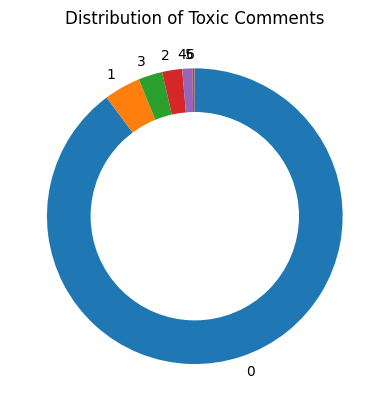

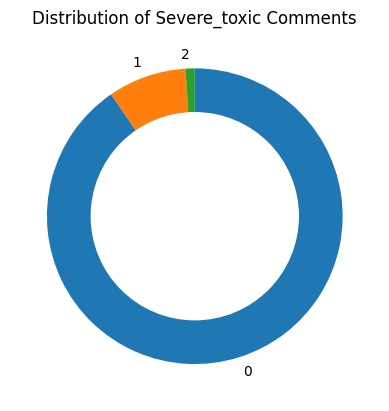

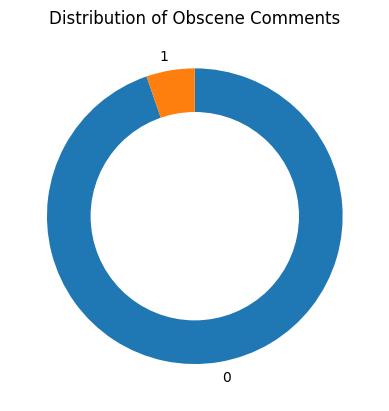

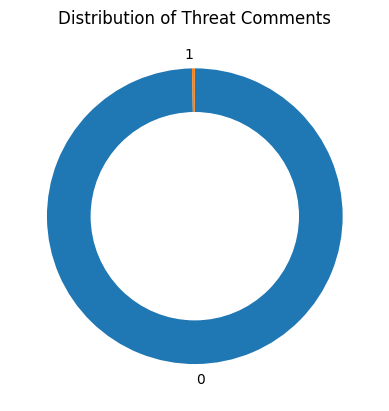

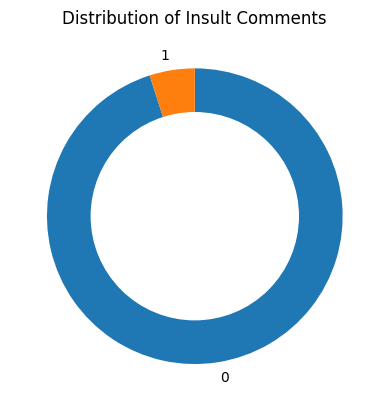

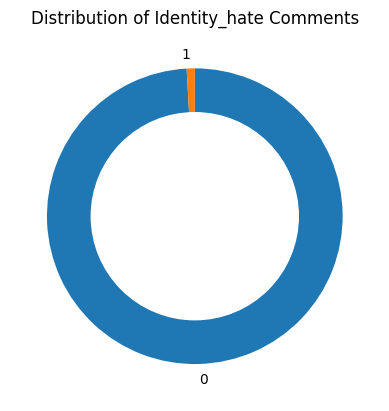

In [16]:
# Define the labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to plot doughnut plots
def plot_doughnut(label):
    sizes = train_data[label].value_counts()
    labels = sizes.index

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
    ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))
    plt.title(f'Distribution of {label.capitalize()} Comments')
    plt.show()

for label in labels:
    plot_doughnut(label)


### Distribution Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_19780\995250334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


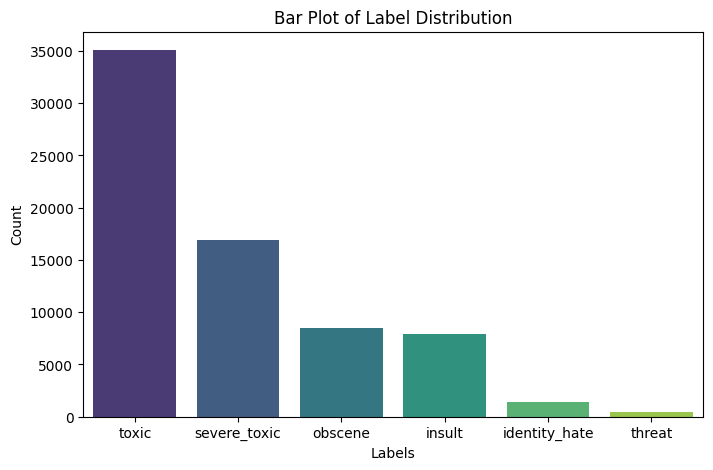

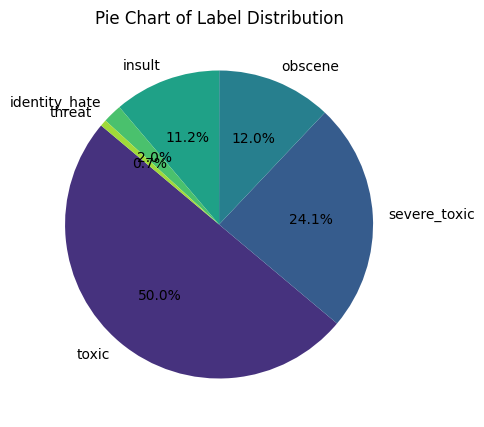

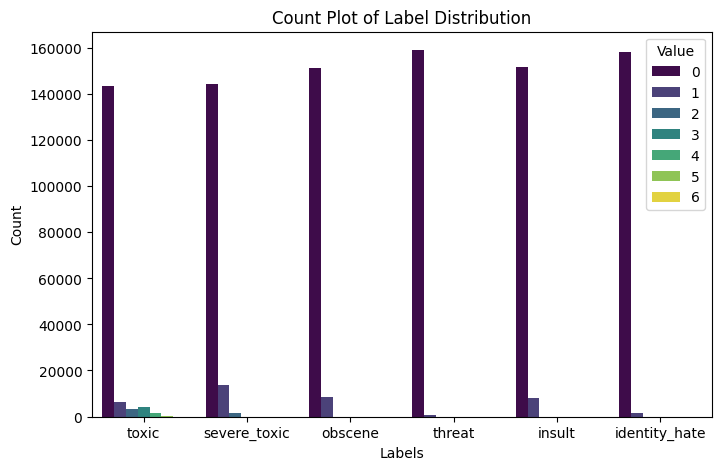

           Label  Count
0          toxic  35098
1   severe_toxic  16889
2        obscene   8449
3         insult   7877
4  identity_hate   1405
5         threat    478


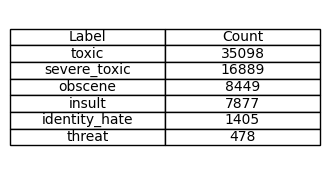

In [17]:
# Define the labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to plot bar plot
def plot_bar(data):
    label_counts = data[labels].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
    plt.title('Bar Plot of Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.show()

# Function to plot pie chart
def plot_pie(data):
    label_counts = data[labels].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
    plt.title('Pie Chart of Label Distribution')
    plt.show()

# Function to plot count plot
def plot_count(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='variable', hue='value', data=pd.melt(data[labels]), palette='viridis')
    plt.title('Count Plot of Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.legend(title='Value')
    plt.show()

# Function to plot frequency table
def plot_frequency_table(data):
    label_counts = data[labels].sum().sort_values(ascending=False)
    frequency_table = pd.DataFrame(label_counts).reset_index()
    frequency_table.columns = ['Label', 'Count']
    print(frequency_table)
    
    fig, ax = plt.subplots(figsize=(4, 2))  # set size frame
    ax.axis('off')  # no visible frame
    ax.axis('tight')  # use tight layout
    ax.table(cellText=frequency_table.values, colLabels=frequency_table.columns, cellLoc = 'center', loc='center')

    plt.show()

# Call the functions
plot_bar(train_data)
plot_pie(train_data)
plot_count(train_data)
plot_frequency_table(train_data)


In [18]:
# Plot the distribution of different classes in the training data
#plt.figure(figsize=(8, 6))
#sns.countplot(x='toxic', data=train_data)
#plt.title('Distribution of Toxic Comments')
#plt.show()

# Similarly, you can plot for other classes if they exist
# Repeat the process for other labels like 'severe_toxic', 'obscene', etc.

In [19]:
# Define the labels
#labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to print histograms of the label distributions
#def print_histograms(data):
 #   """This function prints the histogram distribution of each label in the dataset"""
  #  plt.figure(figsize=(12, 8))
   # for i, label in enumerate(labels):
    #    plt.subplot(2, 3, i+1)
     #   sns.histplot(data[label], kde=False, bins=2)
      #  plt.title(f'Histogram of {label.capitalize()}')
  #  plt.tight_layout()
   # plt.show()
#print_histograms(train_data)

In [20]:
# Distribution analysis of each label in the training data
#labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#plt.figure(figsize=(12, 8))
#for i, label in enumerate(labels):
 #   plt.subplot(2, 3, i+1)
  #  sns.countplot(x=label, data=train_data)
   # plt.title(f'Distribution of {label.capitalize()} Comments')
#plt.tight_layout()
#plt.show()


## Correlation Analysis

### Heatmap

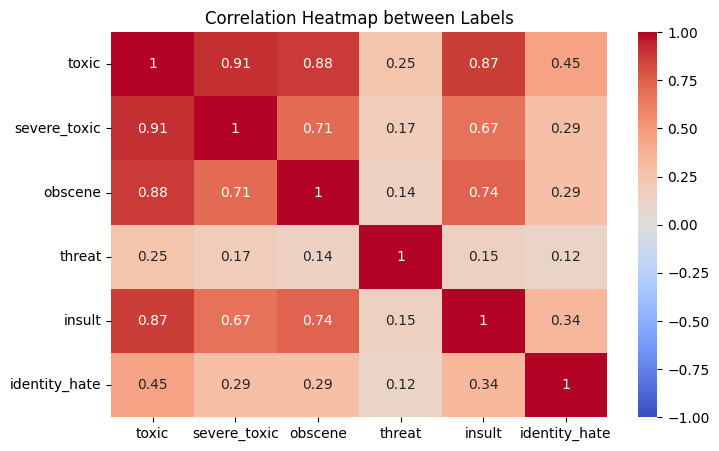

In [21]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = train_data[labels].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Labels')
plt.show()

### WordClouds Visualization

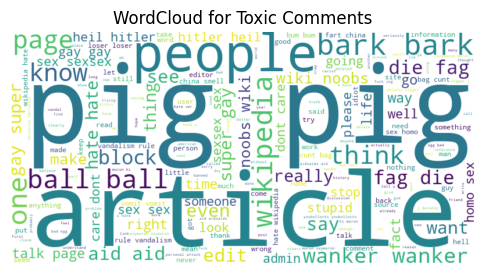

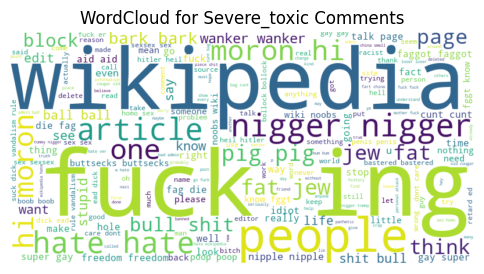

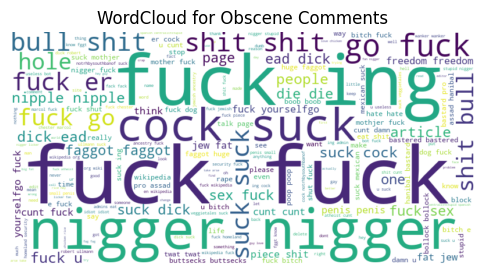

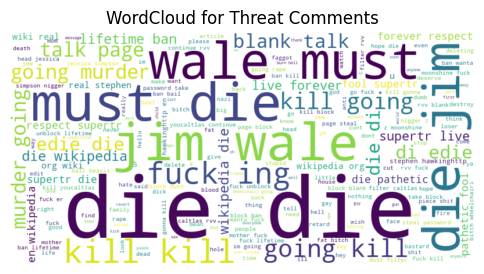

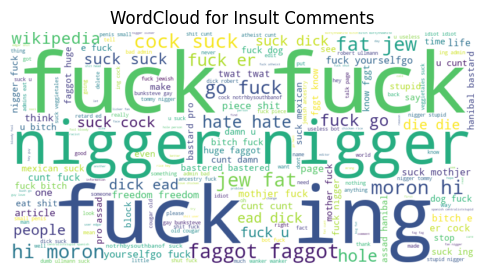

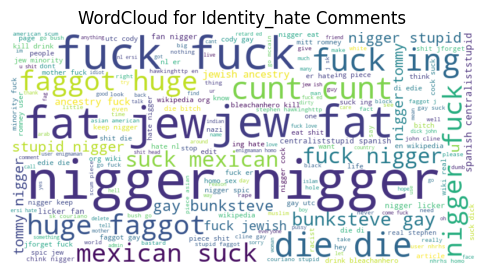

In [22]:
from wordcloud import WordCloud

def plot_wordcloud(label):
    subset = train_data[train_data[label] == 1]
    text = ' '.join(subset['comment_text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label.capitalize()} Comments')
    plt.show()

for label in labels:
    plot_wordcloud(label)

### Stacked Bar Plot

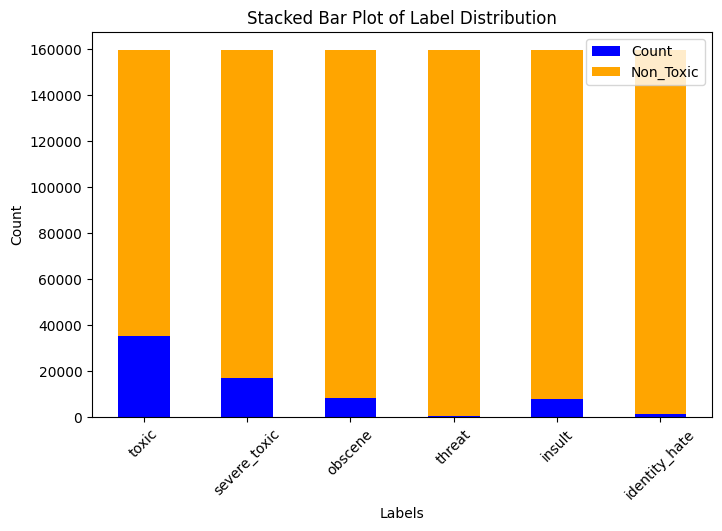

In [23]:
# Function to plot stacked bar plot
def plot_stacked_bar(data):
    label_counts = data[labels].sum()
    df_label_counts = label_counts.to_frame().reset_index()
    df_label_counts.columns = ['Label', 'Count']
    df_label_counts['Non_Toxic'] = len(data) - df_label_counts['Count']
    df_label_counts.set_index('Label', inplace=True)
    df_label_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['blue', 'orange'])
    plt.title('Stacked Bar Plot of Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
plot_stacked_bar(train_data)

### Chi-Square Test of Independence

In [24]:
from scipy.stats import chi2_contingency

def chi_square_test(data):
    chi2_results = {}
    for label1 in labels:
        for label2 in labels:
            if label1 != label2:
                contingency_table = pd.crosstab(data[label1], data[label2])
                chi2, p, _, _ = chi2_contingency(contingency_table)
                chi2_results[f'{label1} vs {label2}'] = p
    chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Label Pair', 'p-value'])
    print(chi2_df)

chi_square_test(train_data)

                       Label Pair  p-value
0           toxic vs severe_toxic      0.0
1                toxic vs obscene      0.0
2                 toxic vs threat      0.0
3                 toxic vs insult      0.0
4          toxic vs identity_hate      0.0
5           severe_toxic vs toxic      0.0
6         severe_toxic vs obscene      0.0
7          severe_toxic vs threat      0.0
8          severe_toxic vs insult      0.0
9   severe_toxic vs identity_hate      0.0
10               obscene vs toxic      0.0
11        obscene vs severe_toxic      0.0
12              obscene vs threat      0.0
13              obscene vs insult      0.0
14       obscene vs identity_hate      0.0
15                threat vs toxic      0.0
16         threat vs severe_toxic      0.0
17              threat vs obscene      0.0
18               threat vs insult      0.0
19        threat vs identity_hate      0.0
20                insult vs toxic      0.0
21         insult vs severe_toxic      0.0
22         

### Semi-Supervised Learning with Self-Training

In [25]:
# STEPS
#(The model is first trained on the labeled data. Then, it predicts labels for the unlabeled data. 
#The most confident predictions are added to the labeled dataset, and the model is retrained. 
#This process is repeated iteratively)

#1 Train the initial model on the labeled data.
#2 Use the model to predict labels for the unlabeled data.
#3 Select the most confident predictions (e.g., predictions with probability above a certain threshold).
#4 Add these confident predictions to the labeled dataset.
#5 Retrain the model with the expanded labeled dataset.
#6 Repeat steps 2-5 until no more confident predictions can be made or a stopping criterion is met

In [26]:
from sklearn.preprocessing import StandardScaler

# Example section where you encounter the issue

# Load datasets
train_data = pd.read_csv('train_Dataset.csv')
test_data = pd.read_csv('test_Dataset.csv')
test_labels = pd.read_csv('test_labels.csv')

# Preprocess test labels to replace -1 with NaN
test_labels.replace(-1, pd.NA, inplace=True)

# Merge test data with labels
test_data = test_data.merge(test_labels, on='id')

# Separate labeled and unlabeled test data
labeled_test_data = test_data.dropna()
unlabeled_test_data = test_data[test_data.isna().any(axis=1)]

# Split labeled data into train and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['comment_text'])
y_train = train_df['toxic']

X_val = vectorizer.transform(val_df['comment_text'])
y_val = val_df['toxic']

# Debugging code: Check dimensions before fitting the model
print("Shapes before fitting the model:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

# Scaling the data
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize model
model = LogisticRegression(max_iter=200, solver='lbfgs')

# Fit your model
model.fit(X_train, y_train)

# After fitting, check dimensions again if needed
# Example:
# y_pred = model.predict(X_val)
# print("Shapes after prediction:")
# print("X_val shape:", X_val.shape)
# print("y_pred shape:", y_pred.shape)

# Self-training loop with SMOTE and further processing...


Shapes before fitting the model:
X_train shape: (127656, 5000)
y_train shape: (127656,)
X_val shape: (31915, 5000)
y_val shape: (31915,)


LogisticRegression(max_iter=200)

In [27]:
import pandas as pd
import numpy as np
from scipy.sparse import vstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load datasets (assuming you have already loaded and preprocessed your data)
train_data = pd.read_csv('train_Dataset.csv')
test_data = pd.read_csv('test_Dataset.csv')
test_labels = pd.read_csv('test_labels.csv')

# Preprocess test labels to replace -1 with NaN
test_labels.replace(-1, pd.NA, inplace=True)

# Merge test data with labels
test_data = test_data.merge(test_labels, on='id')

# Drop rows with NaN in the comment_text
train_data.dropna(subset=['comment_text'], inplace=True)
test_data.dropna(subset=['comment_text'], inplace=True)

# Separate labeled and unlabeled test data
labeled_test_data = test_data.dropna()
unlabeled_test_data = test_data[test_data.isna().any(axis=1)]

# Split labeled data into train and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

# Vectorize text data for traditional ML models
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['comment_text'])
y_train = train_df['toxic']

X_val = vectorizer.transform(val_df['comment_text'])
y_val = val_df['toxic']

X_unlabeled_test = vectorizer.transform(unlabeled_test_data['comment_text'])

# Initial model training
model = LogisticRegression(max_iter=200, solver='lbfgs')
model.fit(X_train, y_train)

# Self-training loop
threshold = 0.9  # Confidence threshold
max_iterations = 5

for iteration in range(max_iterations):
    # Predict probabilities for unlabeled data
    probas = model.predict_proba(X_unlabeled_test)
    max_probas = probas.max(axis=1)
    
    # Select confident predictions
    confident_indices = max_probas > threshold
    confident_predictions = model.predict(X_unlabeled_test[confident_indices])
    
    # Add confident predictions to the training set
    X_train = vstack([X_train, X_unlabeled_test[confident_indices]])
    y_train = np.concatenate([y_train, confident_predictions])
    
    # Remove confident predictions from unlabeled set
    X_unlabeled_test = X_unlabeled_test[~confident_indices]
    
    # Retrain the model
    model.fit(X_train, y_train)
    
    # Break if no confident predictions are left
    if not confident_indices.any():
        break

# Final evaluation on labeled test data
y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]
print("Logistic Regression Self-Training:\n", classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, average='macro'))
print("Recall:", recall_score(y_val, y_val_pred, average='macro'))
print("F1-Score:", f1_score(y_val, y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_pred_proba))

Logistic Regression Self-Training:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.89      0.64      0.75      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.82      0.86     31915
weighted avg       0.96      0.96      0.96     31915

Accuracy: 0.9584521384928717
Precision: 0.9280702126027767
Recall: 0.81757345789757
F1-Score: 0.8625870265377997
Mean Squared Error: 0.04154786150712831
ROC-AUC: 0.9650077743039864


### Model Building

### Traditional Machine Learning Models

### a. Logistic Regression:

Logistic Regression with SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     28859
           1       0.54      0.81      0.65      3056

    accuracy                           0.91     31915
   macro avg       0.76      0.87      0.80     31915
weighted avg       0.94      0.91      0.92     31915

Accuracy: 0.9149929500234999
Precision: 0.7580414579520566
Recall: 0.8690268912635165
F1-Score: 0.7991461603858181
Mean Squared Error: 0.08500704997650008
ROC-AUC: 0.9376551255073186
Cohen's Kappa: 0.600561735378323


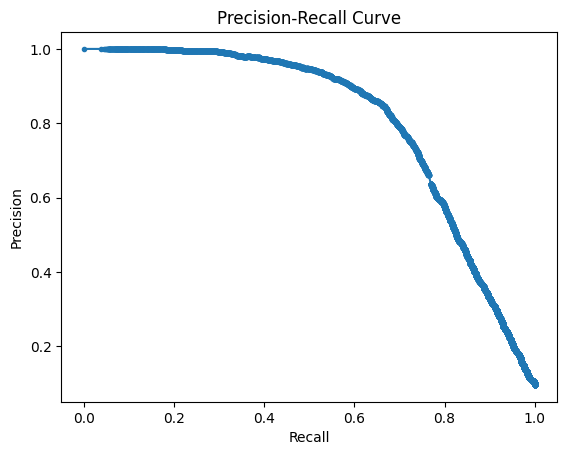

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, 
                             f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, 
                             cohen_kappa_score)
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Define a pipeline with SMOTE and the classifier
def create_pipeline(classifier):
    return Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

# Define classifier
clf = LogisticRegression(max_iter=200, solver='lbfgs')

# Train and evaluate
pipeline = create_pipeline(clf)
pipeline.fit(train_df['comment_text'], train_df['toxic'])
y_val_pred = pipeline.predict(val_df['comment_text'])
y_val_pred_proba = pipeline.predict_proba(val_df['comment_text'])[:, 1]

# Evaluation metrics
print("Logistic Regression with SMOTE:\n", classification_report(val_df['toxic'], y_val_pred))
print("Accuracy:", accuracy_score(val_df['toxic'], y_val_pred))
print("Precision:", precision_score(val_df['toxic'], y_val_pred, average='macro'))
print("Recall:", recall_score(val_df['toxic'], y_val_pred, average='macro'))
print("F1-Score:", f1_score(val_df['toxic'], y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(val_df['toxic'], y_val_pred))
print("ROC-AUC:", roc_auc_score(val_df['toxic'], y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(val_df['toxic'], y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(val_df['toxic'], y_val_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### b. Support Vector Machine (SVM)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM with SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     28859
           1       0.41      0.83      0.55      3056

    accuracy                           0.87     31915
   macro avg       0.69      0.85      0.73     31915
weighted avg       0.92      0.87      0.89     31915

Accuracy: 0.8677424408585305
Precision: 0.6930427871222016
Recall: 0.8502142072241838
F1-Score: 0.734005077398262
Mean Squared Error: 0.13225755914146953
ROC-AUC: 0.9252424940163121
Cohen's Kappa: 0.47837965471013144


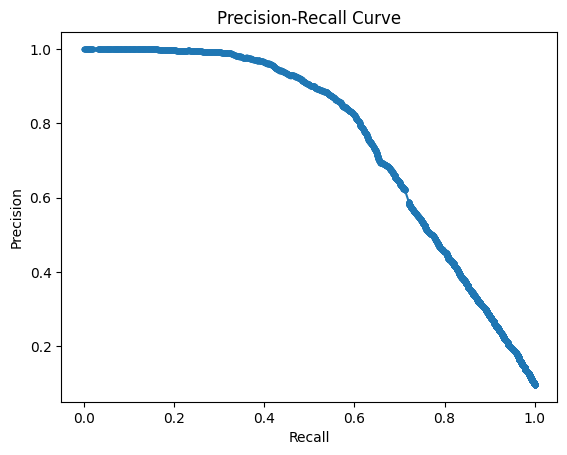

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, 
                             f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, 
                             cohen_kappa_score)
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Define a pipeline with SMOTE and the classifier
def create_pipeline(classifier):
    return Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=3000)),  # Reduced max_features
        ('scaler', StandardScaler(with_mean=False)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

# Define classifier
clf = LinearSVC(max_iter=2000)

# Train and evaluate
pipeline = create_pipeline(clf)
pipeline.fit(train_df['comment_text'], train_df['toxic'])
y_val_pred = pipeline.predict(val_df['comment_text'])

# For LinearSVC, we can't use predict_proba, but we can use decision_function to get similar scores
y_val_pred_proba = pipeline.decision_function(val_df['comment_text'])

# Evaluation metrics
print("SVM with SMOTE:\n", classification_report(val_df['toxic'], y_val_pred))
print("Accuracy:", accuracy_score(val_df['toxic'], y_val_pred))
print("Precision:", precision_score(val_df['toxic'], y_val_pred, average='macro'))
print("Recall:", recall_score(val_df['toxic'], y_val_pred, average='macro'))
print("F1-Score:", f1_score(val_df['toxic'], y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(val_df['toxic'], y_val_pred))
print("ROC-AUC:", roc_auc_score(val_df['toxic'], y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(val_df['toxic'], y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(val_df['toxic'], y_val_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### c. Random Forest

Random Forest with SMOTE:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     28859
           1       0.77      0.65      0.70      3056

    accuracy                           0.95     31915
   macro avg       0.87      0.81      0.84     31915
weighted avg       0.94      0.95      0.95     31915

Accuracy: 0.9478301738994204
Precision: 0.8665850625550309
Recall: 0.8144795255193649
F1-Score: 0.8379572914945796
Mean Squared Error: 0.052169826100579665
ROC-AUC: 0.9182141723915285
Cohen's Kappa: 0.6761392893827678


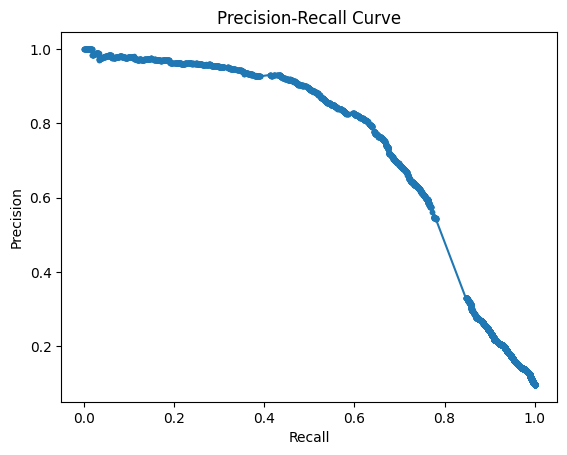

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, 
                             f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, 
                             cohen_kappa_score)
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Define a pipeline with SMOTE and the classifier
def create_pipeline(classifier):
    return Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=3000)),  # Reduced max_features
        ('scaler', StandardScaler(with_mean=False)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

# Define classifier with reduced n_estimators and max_depth
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train and evaluate
pipeline = create_pipeline(clf)
pipeline.fit(train_df['comment_text'], train_df['toxic'])
y_val_pred = pipeline.predict(val_df['comment_text'])
y_val_pred_proba = pipeline.predict_proba(val_df['comment_text'])[:, 1]

# Evaluation metrics
print("Random Forest with SMOTE:\n", classification_report(val_df['toxic'], y_val_pred))
print("Accuracy:", accuracy_score(val_df['toxic'], y_val_pred))
print("Precision:", precision_score(val_df['toxic'], y_val_pred, average='macro'))
print("Recall:", recall_score(val_df['toxic'], y_val_pred, average='macro'))
print("F1-Score:", f1_score(val_df['toxic'], y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(val_df['toxic'], y_val_pred))
print("ROC-AUC:", roc_auc_score(val_df['toxic'], y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(val_df['toxic'], y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(val_df['toxic'], y_val_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### d. Gradient Boosting Classifier

Gradient Boosting with SMOTE:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     28859
           1       0.75      0.66      0.70      3056

    accuracy                           0.95     31915
   macro avg       0.85      0.82      0.83     31915
weighted avg       0.94      0.95      0.94     31915

Accuracy: 0.9455115149616168
Precision: 0.8545037694735165
Recall: 0.8156843079250278
F1-Score: 0.8336293676533241
Mean Squared Error: 0.0544884850383832
ROC-AUC: 0.9119089288432347
Cohen's Kappa: 0.6673944929856759


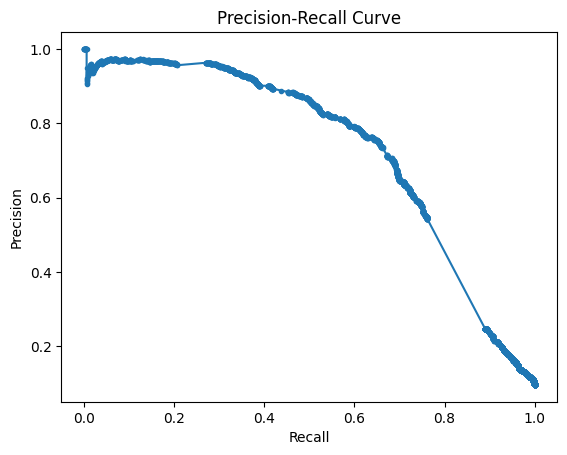

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, 
                             f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, 
                             cohen_kappa_score)
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Define a pipeline with SMOTE and the classifier
def create_pipeline(classifier):
    return Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=3000)),  # Reduced max_features
        ('scaler', StandardScaler(with_mean=False)),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

# Define classifier with reduced n_estimators, increased learning_rate, and limited max_depth
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train and evaluate
pipeline = create_pipeline(clf)
pipeline.fit(train_df['comment_text'], train_df['toxic'])
y_val_pred = pipeline.predict(val_df['comment_text'])
y_val_pred_proba = pipeline.predict_proba(val_df['comment_text'])[:, 1]

# Evaluation metrics
print("Gradient Boosting with SMOTE:\n", classification_report(val_df['toxic'], y_val_pred))
print("Accuracy:", accuracy_score(val_df['toxic'], y_val_pred))
print("Precision:", precision_score(val_df['toxic'], y_val_pred, average='macro'))
print("Recall:", recall_score(val_df['toxic'], y_val_pred, average='macro'))
print("F1-Score:", f1_score(val_df['toxic'], y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(val_df['toxic'], y_val_pred))
print("ROC-AUC:", roc_auc_score(val_df['toxic'], y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(val_df['toxic'], y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(val_df['toxic'], y_val_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### 4. Ensemble Model (Stacking)
### Combining Models

Stacking Ensemble:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       455
           1       0.56      0.40      0.47        45

    accuracy                           0.92       500
   macro avg       0.75      0.68      0.71       500
weighted avg       0.91      0.92      0.91       500

Accuracy: 0.918
Precision: 0.7524038461538461
Recall: 0.6846153846153846
F1-Score: 0.7115560495842186
Mean Squared Error: 0.082
ROC-AUC: 0.7852991452991454
Cohen's Kappa: 0.4244806288601909


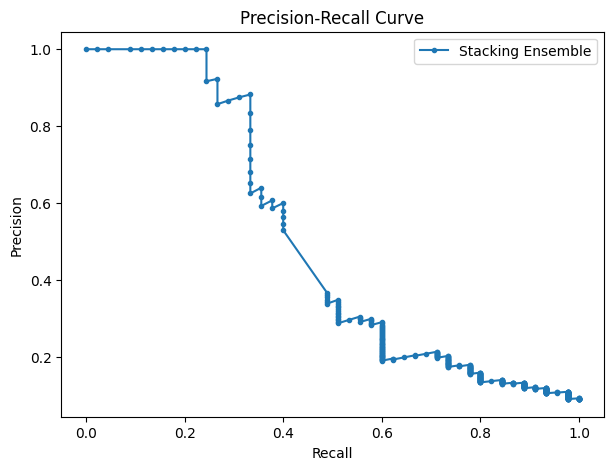

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Custom Transformer for Text Vectorization, Dimensionality Reduction, and Scaling
class TextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Further reduced max_features
        self.svd = TruncatedSVD(n_components=50, random_state=42)  # Reduced n_components
        self.scaler = StandardScaler(with_mean=False)

    def fit(self, X, y=None):
        X_vec = self.vectorizer.fit_transform(X)
        X_svd = self.svd.fit_transform(X_vec)
        self.scaler.fit(X_svd)
        return self

    def transform(self, X):
        X_vec = self.vectorizer.transform(X)
        X_svd = self.svd.transform(X_vec)
        return self.scaler.transform(X_svd)

# Sample a smaller subset for testing
train_sample = train_df.sample(n=1000, random_state=42)
val_sample = val_df.sample(n=500, random_state=42)

# Apply SMOTE to the training data
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_vec = vectorizer.fit_transform(train_sample['comment_text'])
X_val_vec = vectorizer.transform(val_sample['comment_text'])

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_vec, train_sample['toxic'])

# Convert the resampled data to DataFrame for consistency
X_res_df = pd.DataFrame(X_res.toarray(), columns=vectorizer.get_feature_names_out())
X_val_df = pd.DataFrame(X_val_vec.toarray(), columns=vectorizer.get_feature_names_out())

# Define base models with fewer models
base_models = [
    ('lr', LogisticRegression(max_iter=200, solver='lbfgs')),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define the stacking model
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stack_model.fit(X_res_df, y_res)

# Evaluation
y_val_pred = stack_model.predict(X_val_df)
y_val_pred_proba = stack_model.predict_proba(X_val_df)[:, 1]

# Calculate evaluation metrics
print("Stacking Ensemble:\n", classification_report(val_sample['toxic'], y_val_pred))
print("Accuracy:", accuracy_score(val_sample['toxic'], y_val_pred))
print("Precision:", precision_score(val_sample['toxic'], y_val_pred, average='macro'))
print("Recall:", recall_score(val_sample['toxic'], y_val_pred, average='macro'))
print("F1-Score:", f1_score(val_sample['toxic'], y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(val_sample['toxic'], y_val_pred))
print("ROC-AUC:", roc_auc_score(val_sample['toxic'], y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(val_sample['toxic'], y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(val_sample['toxic'], y_val_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label='Stacking Ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Deep Learning Models

### a. Using LSTM

Epoch 1/10
5984/5984 - 1977s - loss: 0.2547 - accuracy: 0.9011 - val_loss: 0.2317 - val_accuracy: 0.9017 - 1977s/epoch - 330ms/step
Epoch 2/10
5984/5984 - 1686s - loss: 0.1876 - accuracy: 0.9210 - val_loss: 0.1621 - val_accuracy: 0.9358 - 1686s/epoch - 282ms/step
Epoch 3/10
5984/5984 - 1264s - loss: 0.1587 - accuracy: 0.9313 - val_loss: 0.1852 - val_accuracy: 0.9268 - 1264s/epoch - 211ms/step
Epoch 4/10
5984/5984 - 1292s - loss: 0.1367 - accuracy: 0.9398 - val_loss: 0.1949 - val_accuracy: 0.9236 - 1292s/epoch - 216ms/step
Epoch 5/10
5984/5984 - 1307s - loss: 0.1206 - accuracy: 0.9466 - val_loss: 0.1915 - val_accuracy: 0.9310 - 1307s/epoch - 218ms/step
Epoch 6/10
5984/5984 - 1277s - loss: 0.1080 - accuracy: 0.9518 - val_loss: 0.1882 - val_accuracy: 0.9367 - 1277s/epoch - 213ms/step
Epoch 7/10
5984/5984 - 1266s - loss: 0.0993 - accuracy: 0.9563 - val_loss: 0.1918 - val_accuracy: 0.9393 - 1266s/epoch - 212ms/step
Epoch 8/10
5984/5984 - 1260s - loss: 0.0911 - accuracy: 0.9598 - val_loss: 0

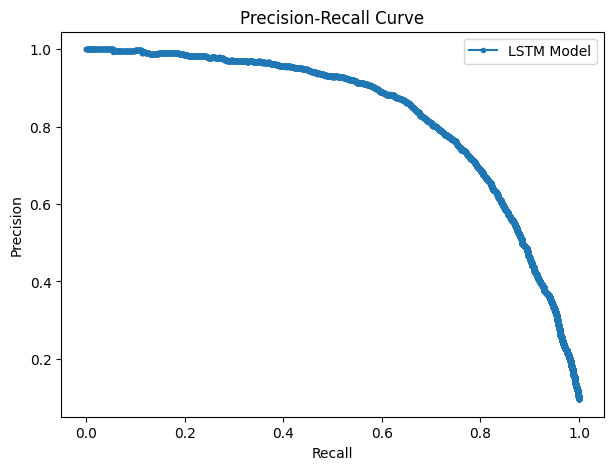

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score, 
                             f1_score, mean_squared_error, roc_auc_score, precision_recall_curve, 
                             cohen_kappa_score)
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import nlpaug.augmenter.word as naw
import random

# Function for data augmentation
def augment_text(data, labels, augmenter, n_aug=1):
    augmented_text = []
    augmented_labels = []
    for _ in range(n_aug):
        for text, label in zip(data, labels):
            augmented_text.append(augmenter.augment(text))
            augmented_labels.append(label)
    return augmented_text, augmented_labels

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(train_df['toxic'])
y_val_enc = le.transform(val_df['toxic'])

# Tokenization and padding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['comment_text'].values)
X_train_seq = tokenizer.texts_to_sequences(train_df['comment_text'].values)
X_val_seq = tokenizer.texts_to_sequences(val_df['comment_text'].values)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_val_pad = pad_sequences(X_val_seq, maxlen=100)

# Data augmentation
synonym_augmenter = naw.SynonymAug(aug_src='wordnet')
augmented_text, augmented_labels = augment_text(train_df['comment_text'].values, y_train_enc, synonym_augmenter, n_aug=2)

# Flatten the augmented text list
augmented_text_flat = [item for sublist in augmented_text for item in sublist]

# Combine original and augmented data
X_train_combined = np.concatenate((train_df['comment_text'].values, augmented_text_flat))
y_train_combined = np.concatenate((y_train_enc, augmented_labels))

# Re-tokenize and pad the combined data
X_train_seq_combined = tokenizer.texts_to_sequences(X_train_combined)
X_train_pad_combined = pad_sequences(X_train_seq_combined, maxlen=100)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_combined), y=y_train_combined)
class_weights_dict = dict(enumerate(class_weights))

# LSTM Model
model = Sequential()
model.add(Embedding(5000, 128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training with class weights
history = model.fit(X_train_pad_combined, y_train_combined, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_enc), class_weight=class_weights_dict, verbose=2)

# Evaluation
y_val_pred = (model.predict(X_val_pad) > 0.5).astype("int32")
y_val_pred_proba = model.predict(X_val_pad)

# Evaluation metrics
print("LSTM:\n", classification_report(y_val_enc, y_val_pred))
print("Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("Precision:", precision_score(y_val_enc, y_val_pred, average='macro'))
print("Recall:", recall_score(y_val_enc, y_val_pred, average='macro'))
print("F1-Score:", f1_score(y_val_enc, y_val_pred, average='macro'))
print("Mean Squared Error:", mean_squared_error(y_val_enc, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val_enc, y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(y_val_enc, y_val_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val_enc, y_val_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label='LSTM Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### b. Using BERT

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
3990/3990 [==============================] - 101956s 26s/step - loss: 0.0964 - accuracy: 0.9633 - val_loss: 0.0849 - val_accuracy: 0.9655
Epoch 2/3
3990/3990 [==============================] - 99438s 25s/step - loss: 0.0609 - accuracy: 0.9760 - val_loss: 0.0924 - val_accuracy: 0.9656
Epoch 3/3
998/998 [==============================] - 6105s 6s/step
BERT:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     28859
           1       0.82      0.81      0.82      3056

    accuracy                           0.96     31915
   macro avg       0.90      0.89      0.90     31915
weighted avg       0.96      0.96      0.96     31915

Accuracy: 0.964969450101833
Precision: 0.9015320045201525
Recall: 0.8944669472116551
F1-Score: 0.8979588772642704
ROC-AUC: 0.9729137552523381
Cohen's Kappa: 0.7959198556048688


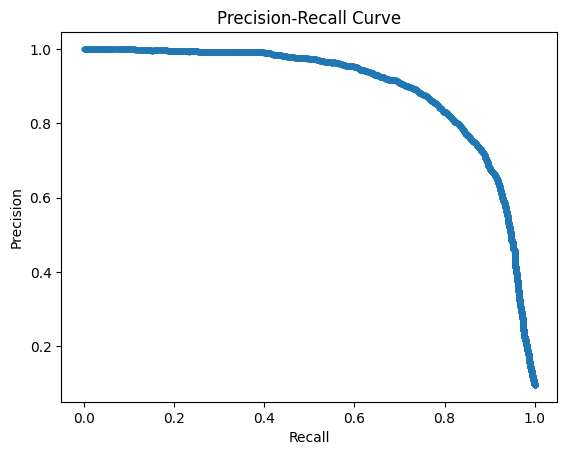

In [34]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, precision_recall_curve
import matplotlib.pyplot as plt

# Load BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenization and padding
train_encodings = bert_tokenizer(train_df['comment_text'].tolist(), truncation=True, padding=True, max_length=128)
val_encodings = bert_tokenizer(val_df['comment_text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_df['toxic'].values
)).shuffle(100).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_df['toxic'].values
)).batch(32)

# Compile model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training
bert_model.fit(train_dataset, epochs=3, validation_data=val_dataset)

# Evaluation
y_val_pred_logits = bert_model.predict(val_dataset).logits
y_val_pred = tf.argmax(y_val_pred_logits, axis=1).numpy()
y_val_pred_proba = tf.nn.softmax(y_val_pred_logits, axis=1).numpy()[:, 1]

y_val = val_df['toxic'].values  # Actual labels

print("BERT:\n", classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, average='macro'))
print("Recall:", recall_score(y_val, y_val_pred, average='macro'))
print("F1-Score:", f1_score(y_val, y_val_pred, average='macro'))
print("ROC-AUC:", roc_auc_score(y_val, y_val_pred_proba))
print("Cohen's Kappa:", cohen_kappa_score(y_val, y_val_pred))

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
